## RNA EDA

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Read the data into a DataFrame
rna_data = pd.read_csv("RNA_sequences.txt")

In [3]:
rna_data

,>P_1|1|training
0,CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU
1,>P_2|1|training
2,CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC
3,>P_3|1|training
4,GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA
...,...
472,AGCAGAUCAUUACUGAAUAACACUAGGAGAAGGCACUUGAA
473,>N_119|0|training
474,GAUUCUUUCCUUAAGAUUUGCUUUAAUUUUAAUUAUUUGUA
475,>N_120|0|training


In [4]:
# Display the head of the DataFrame
print("Head of the DataFrame:")
print(rna_data.head())
print()

Head of the DataFrame:
                             >P_1|1|training
0  CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU
1                            >P_2|1|training
2  CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC
3                            >P_3|1|training
4  GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA



In [5]:
# Display the tail of the DataFrame
print("Tail of the DataFrame:")
print(rna_data.tail())
print()


Tail of the DataFrame:
                               >P_1|1|training
472  AGCAGAUCAUUACUGAAUAACACUAGGAGAAGGCACUUGAA
473                          >N_119|0|training
474  GAUUCUUUCCUUAAGAUUUGCUUUAAUUUUAAUUAUUUGUA
475                          >N_120|0|training
476  ACUCAGGUCUCCUUUGAGAGCAGAACUCAGUCUUAUGUGCU



In [6]:
# Display basic statistics of the DataFrame
print("Description of the DataFrame:")
print(rna_data.describe())
print()

Description of the DataFrame:
         >P_1|1|training
count                477
unique               476
top     >P_39|1|training
freq                   2



In [7]:
# Display data types of each column
print("Data types of each column:")
print(rna_data.dtypes)
print()

Data types of each column:
>P_1|1|training    object
dtype: object



In [8]:
rna_data.shape

(477, 1)

In [9]:
rna_data.columns.tolist()

['>P_1|1|training']

In [10]:
rna_data.nunique()

>P_1|1|training    476
dtype: int64

In [11]:
# Display unique values in each column
print("Unique values in each column:")
for column in rna_data.columns:
    unique_values = rna_data[column].unique()
    print(f"{column}: {unique_values}")
print()

Unique values in each column:
>P_1|1|training: ['CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU' '>P_2|1|training'
 'CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC' '>P_3|1|training'
 'GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA' '>P_4|1|training'
 'GUGCAGUGGUAGAAUUCUCGCCUCCCACGUGGGAGACCCGG' '>P_5|1|training'
 'UGACUGCAGAUCAAGAGGUCCCCGGUUCAAAUCCGGGUGCC' '>P_6|1|training'
 'GCUGAAGGCAUUCAAAGGUUCCGGGUUCGAGUCCCGGCGGA' '>P_7|1|training'
 'AGAUGUUGGUGGUAGUAGCACAUAUUCUAAAGAGAACUUCA' '>P_8|1|training'
 'AGCCCAGGGCUGGGCCCGGGCAGAGCCGCCGCAGGUGCAGA' '>P_9|1|training'
 'CUGCGGUGAGUCUUGAAGCCCAGGGCUGGGCCCGGGCAGAG' '>P_10|1|training'
 'UAUUUGAUCGGAUCGUGACCCCAGCCCCGCCGGGCCGACCC' '>P_11|1|training'
 'CGCUGUGGUCCCCGAGGUCCCGGAGCUGGCCCUGCGGGGCC' '>P_12|1|training'
 'GAGACUCUUAAUCUCAGGGUCGUGGGUUCGAGCCCCACGUU' '>P_13|1|training'
 'AGACGCCAGUAAUCAGUGCCCGGCUAGCUCAGUCGGUAGAG' '>P_14|1|training'
 'GGUUCGAAUCCGAGUCACGGCAGGUGGUUCUAACUUGCUGG' '>P_15|1|training'
 'UGCGUUGUGGCCGCAGCAACCUCGGUUCGAAUCCGAGUCAC' '>P_16|1|training'
 

In [12]:
# Check for null values
print("Null values in the DataFrame:")
print(rna_data.isnull().sum())
print()

Null values in the DataFrame:
>P_1|1|training    0
dtype: int64



#  Data Cleaning

In [13]:
import pandas as pd
import re

# Read the data from the file
with open("RNA_sequences.txt", "r") as file:
    data = file.readlines()
    print(data)

# Combine the lines into a single string
combined_data = "".join(data)
print(combined_data)

['>P_1|1|training\n', 'CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU\n', '>P_2|1|training\n', 'CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC\n', '>P_3|1|training\n', 'GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA\n', '>P_4|1|training\n', 'GUGCAGUGGUAGAAUUCUCGCCUCCCACGUGGGAGACCCGG\n', '>P_5|1|training\n', 'UGACUGCAGAUCAAGAGGUCCCCGGUUCAAAUCCGGGUGCC\n', '>P_6|1|training\n', 'GCUGAAGGCAUUCAAAGGUUCCGGGUUCGAGUCCCGGCGGA\n', '>P_7|1|training\n', 'AGAUGUUGGUGGUAGUAGCACAUAUUCUAAAGAGAACUUCA\n', '>P_8|1|training\n', 'AGCCCAGGGCUGGGCCCGGGCAGAGCCGCCGCAGGUGCAGA\n', '>P_9|1|training\n', 'CUGCGGUGAGUCUUGAAGCCCAGGGCUGGGCCCGGGCAGAG\n', '>P_10|1|training\n', 'UAUUUGAUCGGAUCGUGACCCCAGCCCCGCCGGGCCGACCC\n', '>P_11|1|training\n', 'CGCUGUGGUCCCCGAGGUCCCGGAGCUGGCCCUGCGGGGCC\n', '>P_12|1|training\n', 'GAGACUCUUAAUCUCAGGGUCGUGGGUUCGAGCCCCACGUU\n', '>P_13|1|training\n', 'AGACGCCAGUAAUCAGUGCCCGGCUAGCUCAGUCGGUAGAG\n', '>P_14|1|training\n', 'GGUUCGAAUCCGAGUCACGGCAGGUGGUUCUAACUUGCUGG\n', '>P_15|1|training\n', 'UGCGUUGUGGCCGCAGCAA

In [14]:
new_data = combined_data.split(">")

geneID = []
label = []
train_test = []
sequence = []

for i in range(len(new_data)):
    data_temp = new_data[i]
    if(data_temp)!="":
        geneID.append(data_temp.split("|")[0])
        label.append(int(data_temp.split("|")[1]))
        train_test.append(data_temp.split("|")[2].split("\n")[0])
        sequence.append(data_temp.split("|")[2].split("\n")[1])

In [15]:
import pandas as pd

# Assuming your data is stored in lists geneID, label, train_test, and sequence

# Combine the lists into a dictionary
data_dict = {
    "GeneID": geneID,
    "Label": label,
    "Train_Test": train_test,
    "Sequence": sequence
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Display the DataFrame
print(df)


    GeneID  Label Train_Test                                   Sequence
0      P_1      1   training  CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU
1      P_2      1   training  CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC
2      P_3      1   training  GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA
3      P_4      1   training  GUGCAGUGGUAGAAUUCUCGCCUCCCACGUGGGAGACCCGG
4      P_5      1   training  UGACUGCAGAUCAAGAGGUCCCCGGUUCAAAUCCGGGUGCC
..     ...    ...        ...                                        ...
234  N_116      0   training  GUCCUGUGAAGGUUCUGUGCCUCAGUGUAGGAGAAUGCCAU
235  N_117      0   training  ACAAAUGAAGAAUGAGCCAUCUUAUACACAGACUCAGUCUU
236  N_118      0   training  AGCAGAUCAUUACUGAAUAACACUAGGAGAAGGCACUUGAA
237  N_119      0   training  GAUUCUUUCCUUAAGAUUUGCUUUAAUUUUAAUUAUUUGUA
238  N_120      0   training  ACUCAGGUCUCCUUUGAGAGCAGAACUCAGUCUUAUGUGCU

[239 rows x 4 columns]


In [16]:
df.drop(columns=["GeneID"], inplace=True)

In [17]:
df

,Label,Train_Test,Sequence
0,1,training,CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU
1,1,training,CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC
2,1,training,GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA
3,1,training,GUGCAGUGGUAGAAUUCUCGCCUCCCACGUGGGAGACCCGG
4,1,training,UGACUGCAGAUCAAGAGGUCCCCGGUUCAAAUCCGGGUGCC
...,...,...,...
234,0,training,GUCCUGUGAAGGUUCUGUGCCUCAGUGUAGGAGAAUGCCAU
235,0,training,ACAAAUGAAGAAUGAGCCAUCUUAUACACAGACUCAGUCUU
236,0,training,AGCAGAUCAUUACUGAAUAACACUAGGAGAAGGCACUUGAA
237,0,training,GAUUCUUUCCUUAAGAUUUGCUUUAAUUUUAAUUAUUUGUA


In [18]:
# import pandas as pd

# # Assuming 'df' is your DataFrame
# df.to_csv("/Users/Pragya Dhupia/Downloads/Machine Learning Project/New folder/rnadata.csv", index=False)

In [19]:
df.describe()

,Label
count,239.000000
mean,0.502092
std,0.501045
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       239 non-null    int64 
 1   Train_Test  239 non-null    object
 2   Sequence    239 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


In [21]:
df['Train_Test'].value_counts()

training    239
Name: Train_Test, dtype: int64

# BAR PLOT

In [22]:
# Function for creating Data Quality Report for Continuous Variables
def dq_report_continuous(df, feature, description):
    data = df[feature]
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Min.": data.min(),
        "Q1": data.quantile(0.25),
        "Median": data.median(),
        "Q3": data.quantile(0.75),
        "Max.": data.max(),
        "Mean": data.mean(),
        "Std. Dev.": data.std()
    }
    return report


# Function for creating Data Quality Report for Categorical Variables
def dq_report_categorical(df, feature, description):
    data = df[feature]
    mode = data.mode()[0]
    mode_freq = data.value_counts()[mode]
    second_mode = data.value_counts().index[1] if len(data.value_counts()) > 1 else None
    second_mode_freq = data.value_counts()[second_mode] if second_mode is not None else None
    
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Mode": mode,
        "Mode Freq.": mode_freq,
        "Mode %": (mode_freq / len(data)) * 100,
        "2nd Mode": second_mode,
        "2nd Mode Freq.": second_mode_freq,
        "2nd Mode Perc": (second_mode_freq / len(data)) * 100 if second_mode_freq is not None else None
    }
    return report


In [23]:
# Creating Data Quality Reports for All Categorical Variables
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

categorical_reports = []
for col in categorical_columns:
    #description = features_df.loc[features_df['col_name'] == col, 'desc'].values[0]
    report = dq_report_categorical(df, col, "see col name")
    categorical_reports.append(report)

#presents the list of reports as a DataFrame
categorical_reports_df = pd.DataFrame(categorical_reports)

In [24]:
categorical_reports_df

,Feature,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
0,Train_Test,see col name,239,0.0,1,training,239,100.00000,None,NaN,NaN
1,Sequence,see col name,239,0.0,239,AAAAAACUUCUGGUGGUGUGCUGUGGCUUCUUGCUGCUUCU,1,0.41841,GGUCCUAGUCUUAAAUUGUGCUUUCUGCAUUUGUCACAGAA,1.0,0.41841


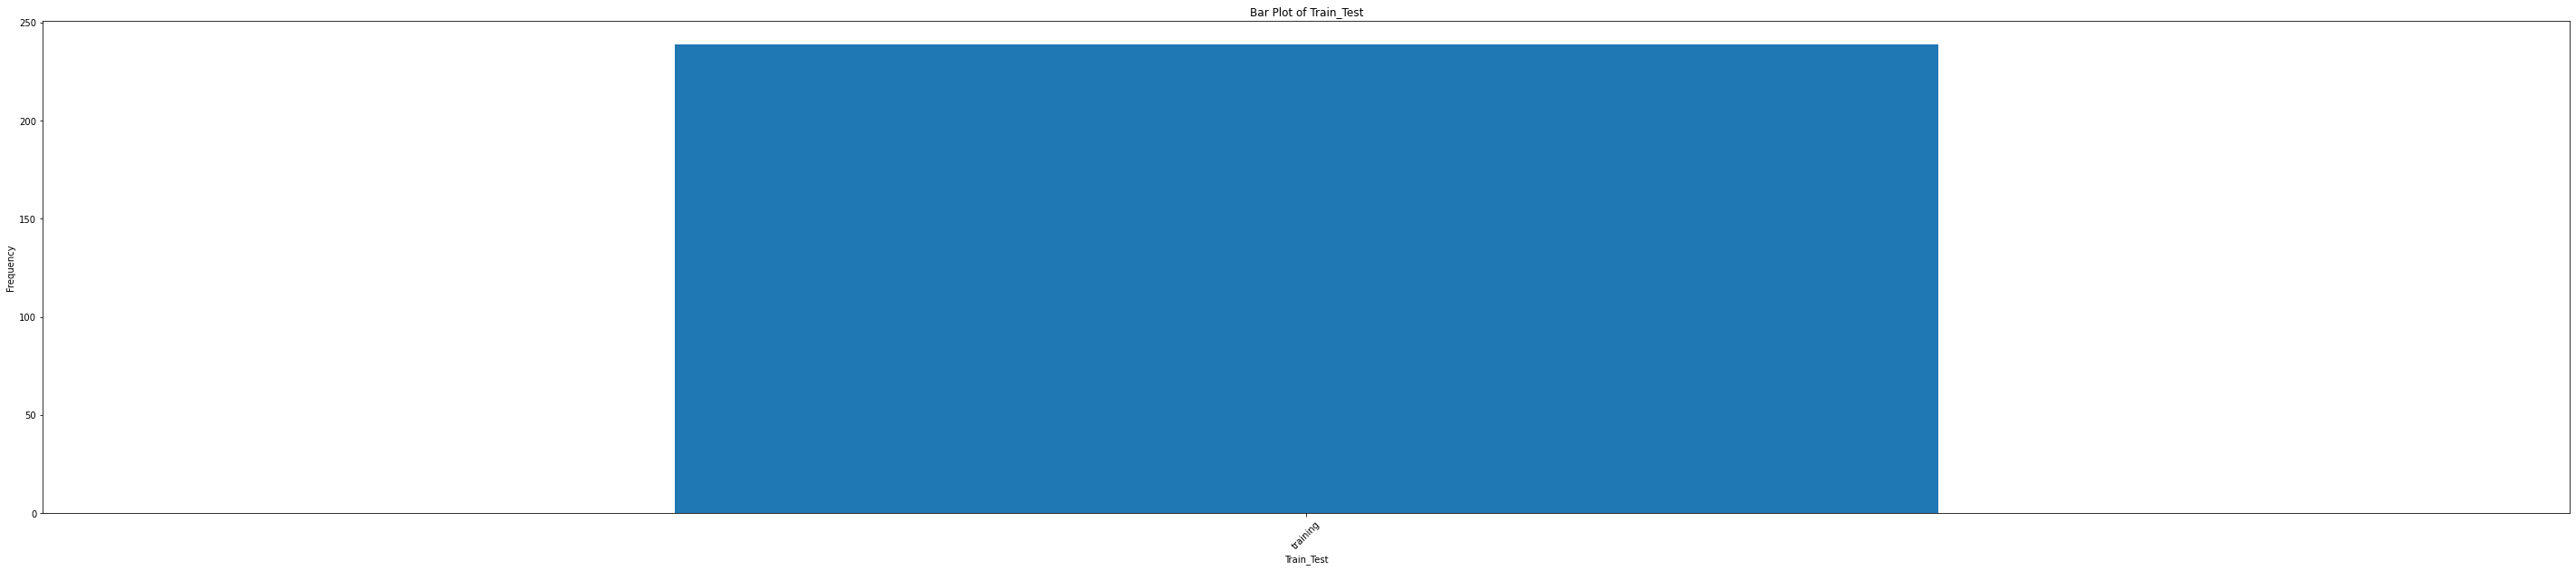

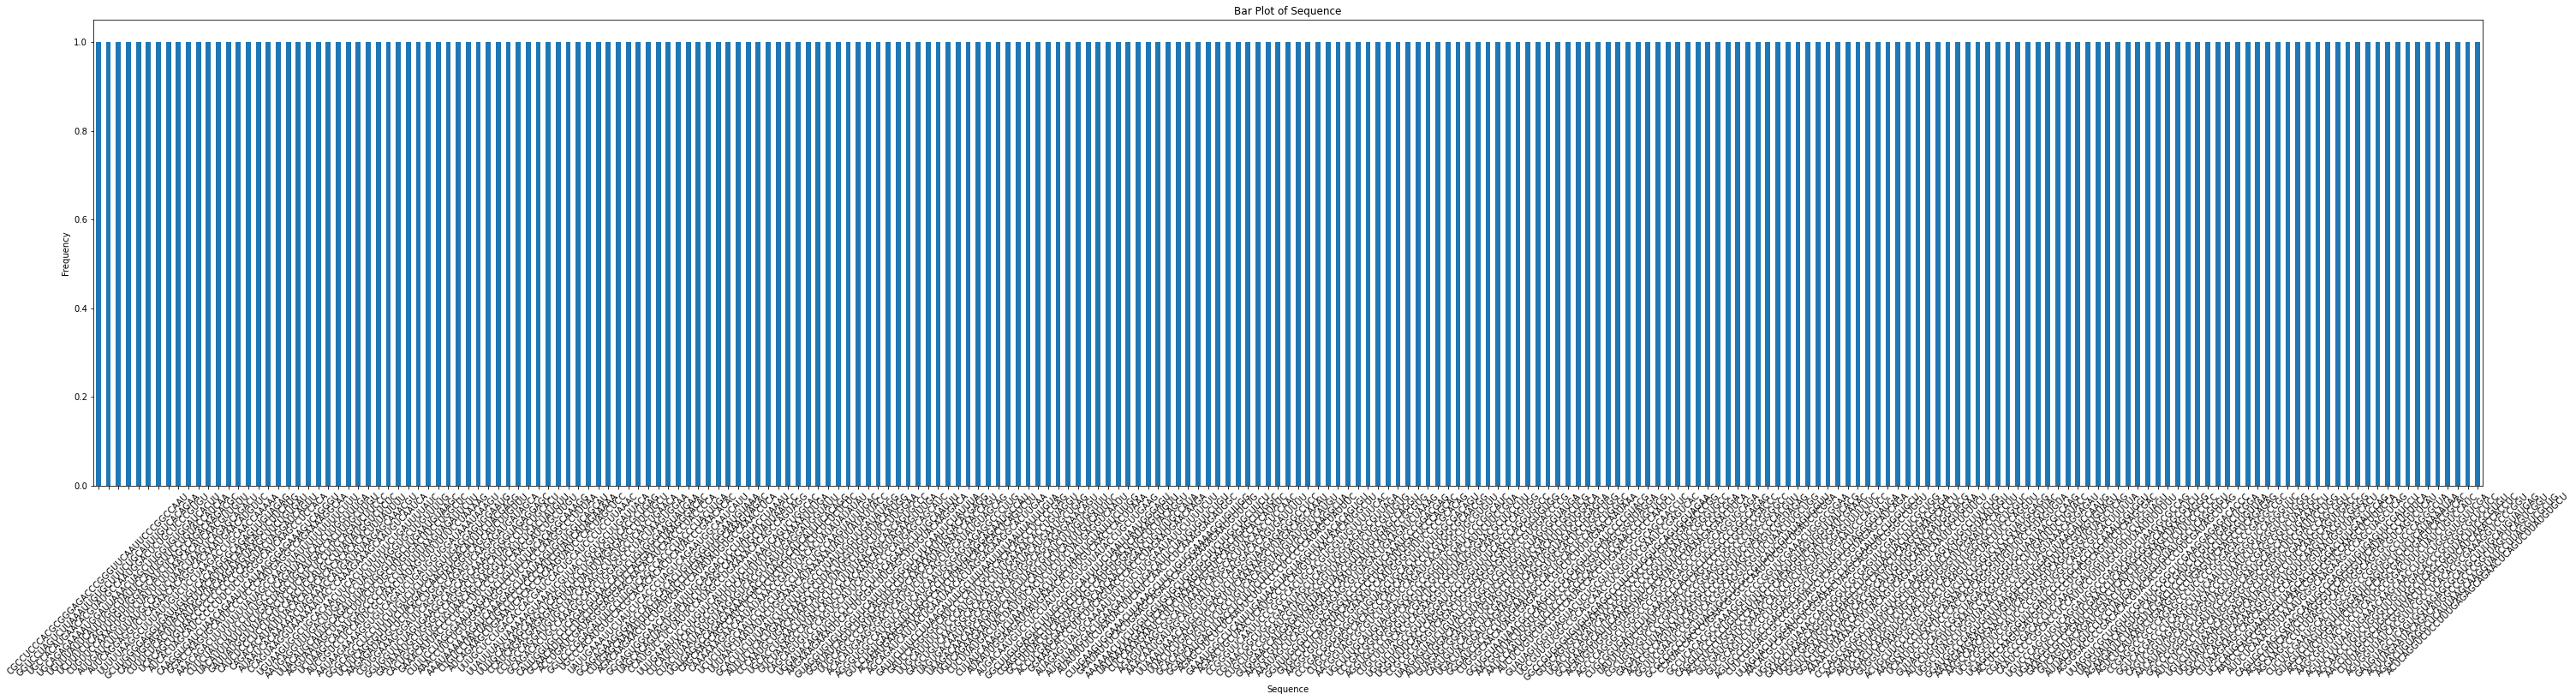

In [25]:
# bar plots
# Plotting bar plots for all categorical variables
import matplotlib.pyplot as plt
for col in categorical_columns:
    plt.figure(figsize=(50, 10))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

# One Hot Encoding

In [26]:
import numpy as np
X_dna = np.array(df['Sequence'])

np.save("/Users/Pragya Dhupia/Downloads/Machine Learning Project/New folder/rna_sequences.npy",X_dna)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neural_network import MLPClassifier


# Assuming df is your DataFrame with 'sequence' as feature column and 'label' as label column

# Separate features and labels
# X = df['sequence'].values.reshape(-1, 1)  # Reshape to 2D array for compatibility with OneHotEncoder
X = np.load("C:/Users/Pragya Dhupia/Downloads/Machine Learning Project/New folder/RNA_OHE_Vectors_300_seq.npy")

y = np.array(df['Label'])

In [28]:
# # # One-hot encode DNA sequences
# # onehot_encoder = OneHotEncoder(sparse=False)
# # X_onehot = onehot_encoder.fit_transform(X)

# #cimport pandas as pd

# # Assuming df is your DataFrame
# # Example DataFrame (replace with your data)


# # Splitting the dataset based on 'train_test' column
# train_data = df[df['Train_Test'] == 'training']
# test_data = df[df['Train_Test'] == 'testing']

# # Separating features and target
# X_train = train_data.drop(['Label', 'Train_Test'], axis=1)
# y_train = train_data['Label']
# X_test = test_data.drop(['Label', 'Train_Test'], axis=1)
# y_test = test_data['Label']

# # Shapes of the split data (for verification)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape


# Split dataset into train and test sets
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
y_train_1

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [31]:
X_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
y_test_1

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

In [33]:
y_train = []
y_test = []

for i in range(len(y_train_1)):
    y_train.append(int(y_train_1[i]))
    
for i in range(len(y_test_1)):
    y_test.append(int(y_test_1[i]))

In [34]:
y_train

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1]

In [35]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),  # Set probability=True for SVC to enable predict_proba
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred, target_names=df['Label'].unique(), output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Weighted F1 Score': weighted_f1, 'ROC AUC': roc_auc}




In [36]:
# Print results
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Weigh.F1', 'ROC AUC'))
for name, metrics in results.items():
    print("{:<20} {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['Weighted F1 Score'], metrics['ROC AUC']))


Classifier           Accuracy   Precision  Recall     F1 Score   Weigh.F1   ROC AUC   
KNN                  0.6667     0.6677     0.6667     0.6651     0.6651     0.7475
SVM                  0.6944     0.6955     0.6944     0.6944     0.6944     0.8448
Naive Bayes          0.6806     0.6826     0.6806     0.6804     0.6804     0.8108
Decision Tree        0.6389     0.6417     0.6389     0.6383     0.6383     0.6402
Random Forest        0.6944     0.6946     0.6944     0.6940     0.6940     0.8097
Gradient Boosting    0.6667     0.6667     0.6667     0.6667     0.6667     0.7799
Logistic Regression  0.7639     0.7643     0.7639     0.7639     0.7639     0.8340
Neural Network       0.7639     0.7663     0.7639     0.7638     0.7638     0.8417


# Confusion Matrix

X_train shape: (167, 1025)
y_train_1 shape: (167,)
[[27 10]
 [14 21]]


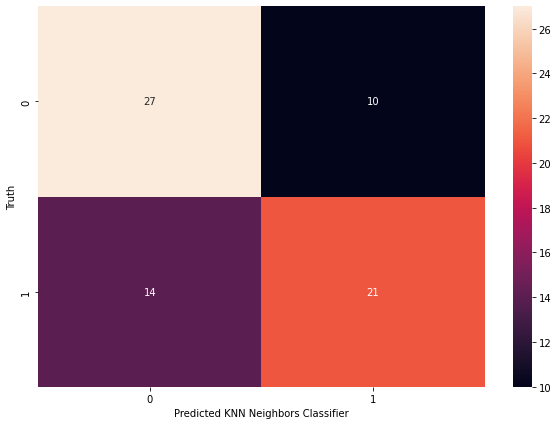

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train_1 shape:", y_train_1.shape)

# from sklearn.ensemble import RandomForestClassifier

# Define the model
model = KNeighborsClassifier()

# Train the model
# Ensure that X_train and y_train are properly defined and correspond to your training data
model.fit(X_train, y_train_1)

# Make predictions
y_pred = model.predict(X_test)  # Ensure X_test is your test features set


from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred)  # y_test_1 should be the true labels for X_test

# Print the confusion matrix
print(cm)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted KNN Neighbors Classifier')
plt.ylabel('Truth')
plt.show()

X_train shape: (167, 1025)
y_train_1 shape: (167,)
[[25 12]
 [10 25]]


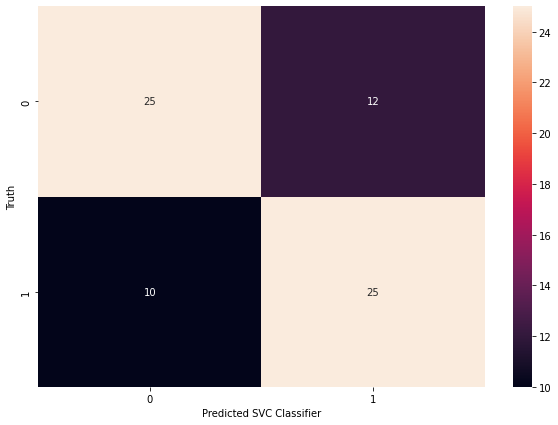

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train_1 shape:", y_train_1.shape)

# from sklearn.ensemble import RandomForestClassifier

# Define the model
model = SVC()

# Train the model
# Ensure that X_train and y_train are properly defined and correspond to your training data
model.fit(X_train, y_train_1)

# Make predictions
y_pred = model.predict(X_test)  # Ensure X_test is your test features set


from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred)  # y_test_1 should be the true labels for X_test

# Print the confusion matrix
print(cm)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted SVC Classifier')
plt.ylabel('Truth')
plt.show()

X_train shape: (167, 1025)
y_train_1 shape: (167,)
[[24 13]
 [10 25]]


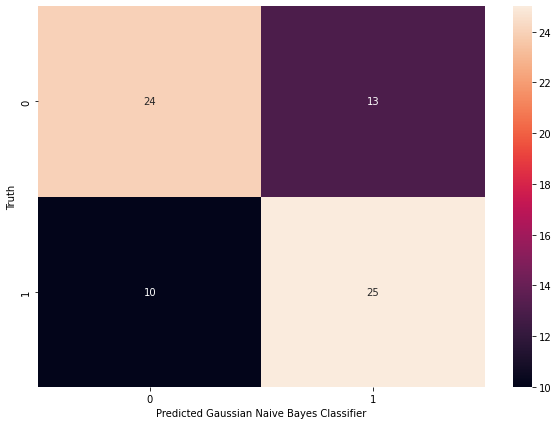

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train_1 shape:", y_train_1.shape)

# from sklearn.ensemble import RandomForestClassifier

# Define the model
model = GaussianNB()

# Train the model
# Ensure that X_train and y_train are properly defined and correspond to your training data
model.fit(X_train, y_train_1)

# Make predictions
y_pred = model.predict(X_test)  # Ensure X_test is your test features set


from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred)  # y_test_1 should be the true labels for X_test

# Print the confusion matrix
print(cm)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Gaussian Naive Bayes Classifier')
plt.ylabel('Truth')
plt.show()

X_train shape: (167, 1025)
y_train_1 shape: (167,)
[[22 15]
 [17 18]]


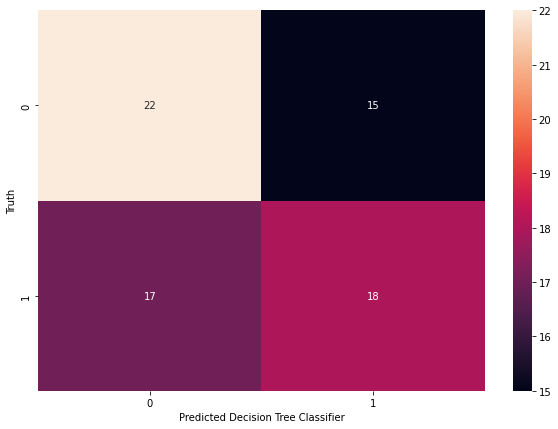

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train_1 shape:", y_train_1.shape)

# from sklearn.ensemble import RandomForestClassifier

# Define the model
model = DecisionTreeClassifier()

# Train the model
# Ensure that X_train and y_train are properly defined and correspond to your training data
model.fit(X_train, y_train_1)

# Make predictions
y_pred = model.predict(X_test)  # Ensure X_test is your test features set


from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred)  # y_test_1 should be the true labels for X_test

# Print the confusion matrix
print(cm)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Decision Tree Classifier')
plt.ylabel('Truth')
plt.show()

X_train shape: (167, 1025)
y_train_1 shape: (167,)
[[29  8]
 [11 24]]


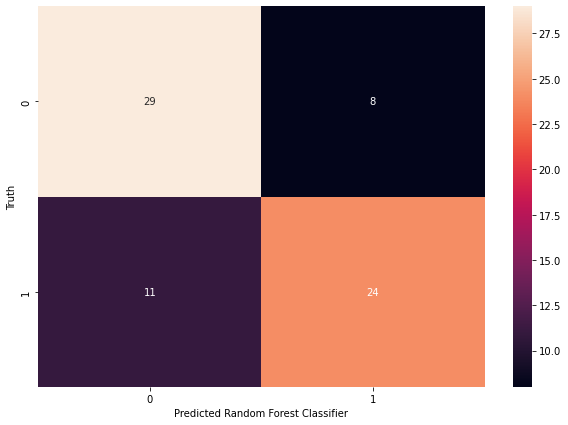

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train_1 shape:", y_train_1.shape)

# from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Train the model
# Ensure that X_train and y_train are properly defined and correspond to your training data
model.fit(X_train, y_train_1)

# Make predictions
y_pred = model.predict(X_test)  # Ensure X_test is your test features set


from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred)  # y_test_1 should be the true labels for X_test

# Print the confusion matrix
print(cm)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Random Forest Classifier')
plt.ylabel('Truth')
plt.show()

In [42]:
# Example:
precision_score(y_test, y_pred, average='weighted')
# # Example:
# import warnings
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

0.7371527777777778

# NGRAM 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer for n-gram representation
vectorizer = CountVectorizer(analyzer='char', ngram_range=(0, 3))

# Fit and transform the data
X_ngram = vectorizer.fit_transform(df["Sequence"])

print("N-gram representation shape:", X_ngram.shape)
print("N-gram representation data:", X_ngram)


N-gram representation shape: (239, 85)
N-gram representation data:   (0, 0)	42
  (0, 22)	17
  (0, 43)	11
  (0, 64)	6
  (0, 1)	7
  (0, 33)	5
  (0, 49)	3
  (0, 28)	8
  (0, 38)	1
  (0, 70)	3
  (0, 23)	3
  (0, 7)	2
  (0, 54)	5
  (0, 44)	2
  (0, 12)	1
  (0, 59)	1
  (0, 80)	2
  (0, 2)	2
  (0, 17)	2
  (0, 35)	2
  (0, 51)	2
  (0, 32)	1
  (0, 40)	1
  (0, 72)	2
  (0, 30)	3
  :	:
  (238, 58)	1
  (238, 71)	2
  (238, 75)	3
  (238, 11)	2
  (238, 77)	1
  (238, 50)	1
  (238, 62)	1
  (238, 83)	1
  (238, 79)	1
  (238, 84)	1
  (238, 65)	1
  (238, 15)	1
  (238, 42)	2
  (238, 26)	3
  (238, 16)	1
  (238, 45)	1
  (238, 74)	2
  (238, 76)	1
  (238, 61)	2
  (238, 53)	1
  (238, 20)	1
  (238, 14)	1
  (238, 69)	1
  (238, 4)	1
  (238, 81)	1


In [44]:
import nltk
from nltk.util import ngrams

# Example DataFrame with DNA sequences
# df = ...

# Access the 'sequence' column from the DataFrame
dna_sequences = df['Sequence']

# Define the value of N for N-grams
N = 3  # Example: Using trigrams

# Function to generate N-grams for a single DNA sequence
def generate_ngrams(sequence):
    nucleotides = list(sequence)
    trigrams = list(ngrams(nucleotides, N))
    trigram_strings = [''.join(trigram) for trigram in trigrams]
    return trigram_strings

# Apply the function to each DNA sequence in the DataFrame
df_grams = df

df_grams['trigrams'] = dna_sequences.apply(generate_ngrams)
#print(df_grams)
df_grams.drop('Sequence', axis = 1)
# Print the DataFrame with added trigrams column
print(df_grams)


     Label Train_Test                                   Sequence  \
0        1   training  CGCCUCCCACGCGGGAGACCCGGGUUCAAUUCCCGGCCAAU   
1        1   training  CCGGGUUCAAUUCCCGGCCACUGCACGUGGUUGUUUUUCAC   
2        1   training  GGCCGUGGGUGUGUAGAGGCCUUGGUGGUGCAGUGGUAGAA   
3        1   training  GUGCAGUGGUAGAAUUCUCGCCUCCCACGUGGGAGACCCGG   
4        1   training  UGACUGCAGAUCAAGAGGUCCCCGGUUCAAAUCCGGGUGCC   
..     ...        ...                                        ...   
234      0   training  GUCCUGUGAAGGUUCUGUGCCUCAGUGUAGGAGAAUGCCAU   
235      0   training  ACAAAUGAAGAAUGAGCCAUCUUAUACACAGACUCAGUCUU   
236      0   training  AGCAGAUCAUUACUGAAUAACACUAGGAGAAGGCACUUGAA   
237      0   training  GAUUCUUUCCUUAAGAUUUGCUUUAAUUUUAAUUAUUUGUA   
238      0   training  ACUCAGGUCUCCUUUGAGAGCAGAACUCAGUCUUAUGUGCU   

                                              trigrams  
0    [CGC, GCC, CCU, CUC, UCC, CCC, CCA, CAC, ACG, ...  
1    [CCG, CGG, GGG, GGU, GUU, UUC, UCA, CAA, AAU, ...  
2    [GGC, G

In [45]:
def generate_nGramFeatures(codes, n):
    nGramFeatures = []
    for codeSeq in codes:
        nGramSeq = nGrams(codeSeq, n)
        nGramCount = Counter(nGramSeq)
        nGramFeatures.append(nGramCount)
    return nGramFeatures


# Define a mapping for the codes to their corresponding tags
code_to_tag = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T',
    21: 'U',
    22: 'V',
    23: 'W',
    24: 'X',
    25: 'Y',
    26: 'Z',

}

def nGrams(sequence, n):
    return zip(*[sequence[i:] for i in range(n)])

In [46]:
def transform_to_nGram_matrix(nGramFeatures, vocab):
    matrix = []
    for features in nGramFeatures:
        row = [features.get(nGram, 0) for nGram in vocab]
        matrix.append(row)
    return np.array(matrix)

In [47]:
from collections import Counter
from itertools import chain, combinations
# Transform the 'Code' column to their corresponding tags
df['Tag'] = df['Sequence'].map(code_to_tag)
Seq = df.groupby(df.index // 6)['Tag'].apply(list)
nGramFeatures = generate_nGramFeatures(Seq, n=2)

nGramAllPossibility = list(chain(*[combinations(code_to_tag.values(), 2)]))
vocab = sorted(set(nGramAllPossibility))

X_nGram = transform_to_nGram_matrix(nGramFeatures, vocab)

y = df['Label'][::6].to_numpy()  

In [48]:
y.shape
X_nGram.shape

(40, 325)

In [49]:
X_nGram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nGram, y, test_size=0.34, random_state=42)

# Initialize classifiers
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),  # Set probability=True for SVC to enable predict_proba
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred, target_names=df['Label'].unique(), output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Weighted F1 Score': weighted_f1, 'ROC AUC': roc_auc}

# classifiers = {
#     'KNN': KNeighborsClassifier(),
#     'SVM': SVC(probability=True),
#     'Naive Bayes': GaussianNB(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Logistic Regression': LogisticRegression()
# }

# # Train and evaluate classifiers
# results = {}
# for name, clf in classifiers.items():
#     # Train the classifier
#     clf.fit(X_train, y_train)
    
#     # Predict on test data
#     y_pred = clf.predict(X_test)
    
#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
# #  roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
#     report = classification_report(y_test, y_pred, target_names=df['Label'].unique(), output_dict=True)
#     weighted_f1 = report['weighted avg']['f1-score']
    
#     # Store results
#     results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Weighted F1 Score': weighted_f1, 'ROC AUC': roc_auc}

# # Print results
# for name, metrics in results.items():
#     print(f"{name}:")
#     for metric, value in metrics.items():
#         print(f"{metric}: {value}")
#     print("\n")



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya 

In [51]:
# Print results
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Weigh.F1', 'ROC AUC'))
for name, metrics in results.items():
    print("{:<20} {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['Weighted F1 Score'], metrics['ROC AUC']))


Classifier           Accuracy   Precision  Recall     F1 Score   Weigh.F1   ROC AUC   
KNN                  0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
SVM                  0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Naive Bayes          0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Decision Tree        0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Random Forest        0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Gradient Boosting    0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Logistic Regression  0.4286     0.1837     0.4286     0.2571     0.2571     0.8417
Neural Network       0.4286     0.1837     0.4286     0.2571     0.2571     0.8417


# HASHING

In [52]:
from sklearn.feature_extraction.text import HashingVectorizer

# Initialize the HashingVectorizer
vectorizer = HashingVectorizer(n_features=100, norm=None, alternate_sign=False)

# Transform the data
X_hashing = vectorizer.fit_transform(df["Sequence"])

print("Hashing representation shape:", X_hashing.shape)
print("Hashing representation data:", X_hashing)


Hashing representation shape: (239, 100)
Hashing representation data:   (0, 84)	1.0
  (1, 50)	1.0
  (2, 25)	1.0
  (3, 73)	1.0
  (4, 53)	1.0
  (5, 25)	1.0
  (6, 41)	1.0
  (7, 95)	1.0
  (8, 5)	1.0
  (9, 98)	1.0
  (10, 56)	1.0
  (11, 64)	1.0
  (12, 66)	1.0
  (13, 10)	1.0
  (14, 47)	1.0
  (15, 17)	1.0
  (16, 31)	1.0
  (17, 20)	1.0
  (18, 65)	1.0
  (19, 46)	1.0
  (20, 1)	1.0
  (21, 83)	1.0
  (22, 7)	1.0
  (23, 58)	1.0
  (24, 96)	1.0
  :	:
  (214, 27)	1.0
  (215, 1)	1.0
  (216, 75)	1.0
  (217, 36)	1.0
  (218, 41)	1.0
  (219, 1)	1.0
  (220, 91)	1.0
  (221, 37)	1.0
  (222, 46)	1.0
  (223, 28)	1.0
  (224, 78)	1.0
  (225, 90)	1.0
  (226, 90)	1.0
  (227, 25)	1.0
  (228, 79)	1.0
  (229, 38)	1.0
  (230, 71)	1.0
  (231, 70)	1.0
  (232, 87)	1.0
  (233, 36)	1.0
  (234, 36)	1.0
  (235, 18)	1.0
  (236, 1)	1.0
  (237, 46)	1.0
  (238, 62)	1.0


In [53]:
hashed_df = pd.DataFrame.sparse.from_spmatrix(X_hashing)
df = df.drop("trigrams", axis =1)
df = df.drop("Sequence", axis =1)
# Concatenate original DataFrame and hashed DataFrame
concatenated_df = pd.concat([df, hashed_df], axis=1)

# Rename columns of hashed DataFrame
hashed_df.columns = ['Hashed_' + str(col) for col in hashed_df.columns]

# Concatenate original DataFrame and hashed DataFrame
hashed_df = pd.concat([df, hashed_df], axis=1)

# Display the new DataFrame
print("Original DataFrame:")
print(df)
print("\nHashed DataFrame:")
print(hashed_df)

Original DataFrame:
     Label Train_Test  Tag
0        1   training  NaN
1        1   training  NaN
2        1   training  NaN
3        1   training  NaN
4        1   training  NaN
..     ...        ...  ...
234      0   training  NaN
235      0   training  NaN
236      0   training  NaN
237      0   training  NaN
238      0   training  NaN

[239 rows x 3 columns]

Hashed DataFrame:
     Label Train_Test  Tag  Hashed_0  Hashed_1  Hashed_2  Hashed_3  Hashed_4  \
0        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
1        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
2        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
3        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
4        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
..     ...        ...  ...       ...       ...       ...       ...       ...   
234      0   training  NaN       0.0       0.0       

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(with_mean=False), SVC(probability=True)),
    'Logistic Regression': make_pipeline(StandardScaler(with_mean=False), LogisticRegression()),
    'Gradient Boosting': make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier())
    #'Naive Bayes': make_pipeline(StandardScaler(with_mean=False), GaussianNB()),
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if hasattr(clf, "predict_proba") else 0

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


K-Nearest Neighbors Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000

Decision Tree Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya 

Random Forest Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000

Support Vector Machine Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000

Logistic Regression Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000

Gradient Boosting Performance:
Accuracy: 0.4286, Precision: 0.2143, Recall: 0.5000, F1 Score: 0.3000, Weighted F1: 0.2571, ROC AUC: 0.5000

